# **이미지 분류**
##### **mnist 데이터**

In [55]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

In [56]:
tf.__version__

'2.13.0'

In [57]:
# 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [59]:
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

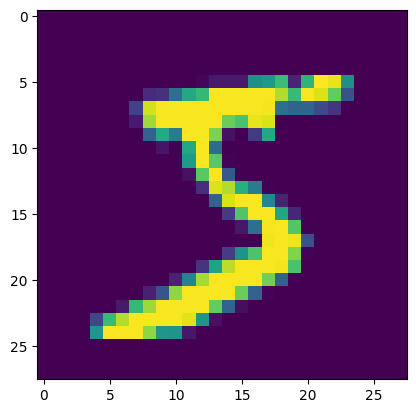

In [60]:
plt.imshow(X_train[0])

In [61]:
y_train[0]

5

In [62]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
# compile
model.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [65]:
# 학습
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 2s 1ms/step - loss: 2.6285 - accuracy: 0.8910
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3353 - accuracy: 0.9273
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2722 - accuracy: 0.9363
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2462 - accuracy: 0.9415
Epoch 5/5
1875/1875 [==============================] - 2s 984us/step - loss: 0.2302 - accuracy: 0.9456


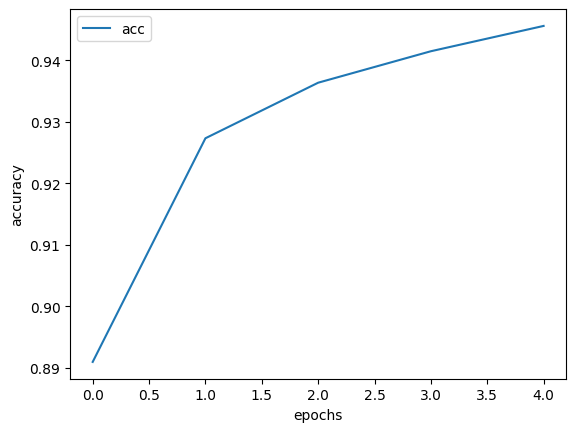

In [66]:
# 학습 정확도 (epoch)에 따른 accuracy변화)
plt.plot(history.history['accuracy'],label ='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

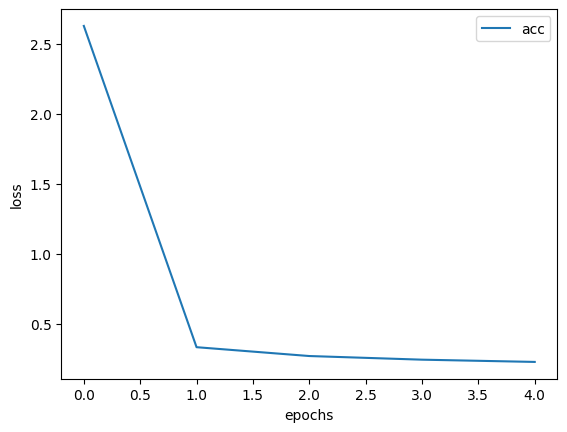

In [67]:
# loss
plt.plot(history.history['loss'],label ='acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#### **fashion_mnist 데이터**

In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# 데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [72]:
# 정규화(0~1사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

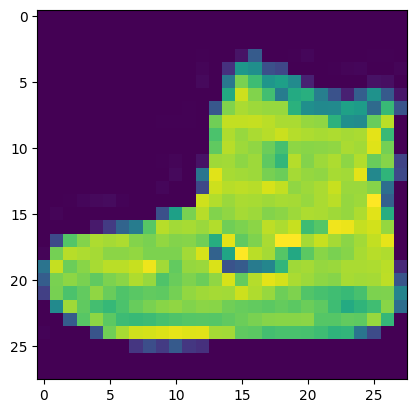

In [73]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [74]:
y_train[0]

9

In [75]:
# label 확인
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

print(classes[y_train[0]])

Ankle boot


T-shirt/top


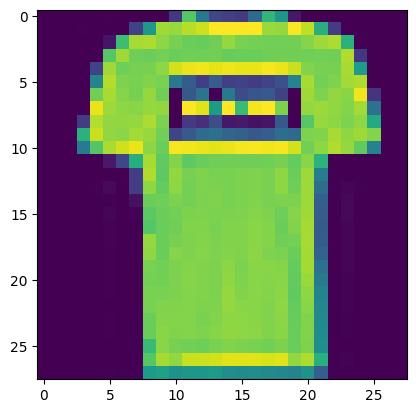

In [78]:
# 데이터 확인(이미지, 레이블)
print(classes[y_train[1]])
plt.imshow(X_train[1])

In [79]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# compile
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [80]:
# 학습
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5093 - accuracy: 0.8184 - val_loss: 0.4262 - val_accuracy: 0.8479
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3892 - accuracy: 0.8593 - val_loss: 0.3988 - val_accuracy: 0.8589
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3558 - accuracy: 0.8688 - val_loss: 0.3598 - val_accuracy: 0.8689
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3319 - accuracy: 0.8755 - val_loss: 0.3532 - val_accuracy: 0.8723
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3171 - accuracy: 0.8833 - val_loss: 0.3855 - val_accuracy: 0.8608
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3060 - accuracy: 0.8873 - val_loss: 0.3368 - val_accuracy: 0.8782
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.8918 - val_loss: 0.3387 - val_accuracy:

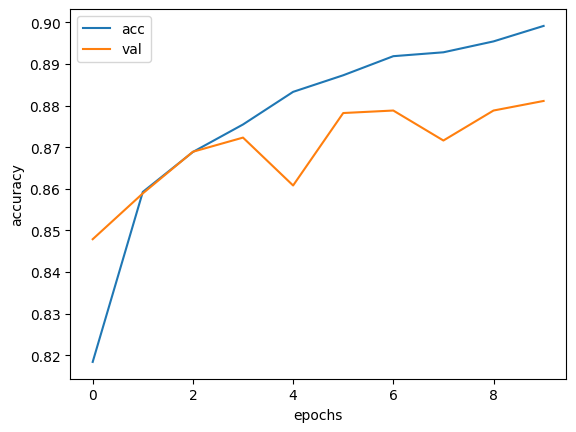

In [81]:
# 학습 정확도 (epoch)에 따른 accuracy변화)
plt.plot(history.history['accuracy'],label ='acc')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

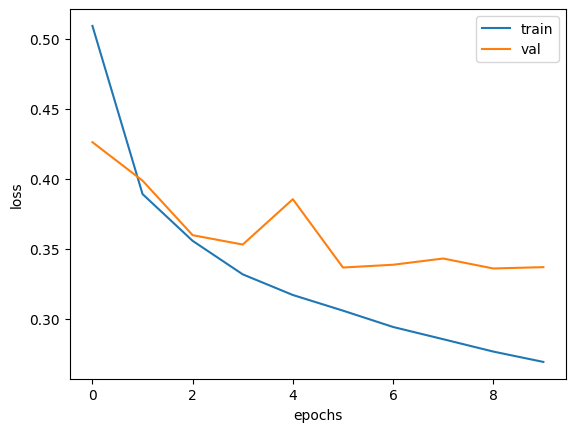

In [84]:
# loss
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [86]:
# 예측
pred = model.predict(X_test)
pred[1]

313/313 [==============================] - 0s 522us/step


array([4.4609010e-06, 9.5052958e-19, 9.9985611e-01, 6.0367222e-13, 7.9478326e-05, 3.9500339e-13, 5.9990987e-05,
       1.7125186e-22, 4.5853213e-12, 6.4410022e-21], dtype=float32)

In [87]:
# 가장 높은 값 찾기 (np.argmax()는 데이터 중 가장 높은 인덱스 값 반환)
np.argmax(pred[1])

2

In [88]:
# 예측한 label
classes[np.argmax(pred[1])]

'Pullover'

In [89]:
# 실제 label
classes[y_test[1]]

'Pullover'

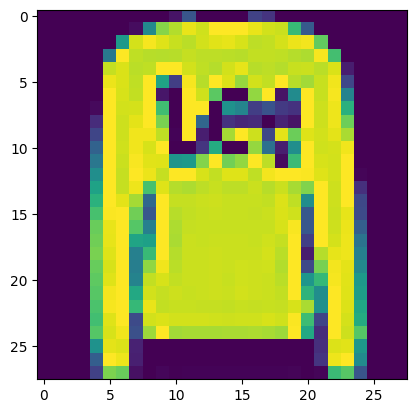

In [90]:
# 이미지 확인
plt.imshow(X_test[1])

## **CNN을 활용한 이미지 분류**

In [92]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [93]:
# 데이터 불러오기 
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [95]:
# shape 변경
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [96]:
# 정규화(0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [97]:
# 모델
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])


In [98]:
# 컴파일
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)         

In [100]:
# 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5865 - accuracy: 0.7855 - val_loss: 0.4682 - val_accuracy: 0.8295
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3972 - accuracy: 0.8554 - val_loss: 0.4045 - val_accuracy: 0.8524
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3429 - accuracy: 0.8747 - val_loss: 0.3657 - val_accuracy: 0.8656
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3074 - accuracy: 0.8868 - val_loss: 0.3481 - val_accuracy: 0.8754
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2797 - accuracy: 0.8962 - val_loss: 0.3278 - val_accuracy: 0.8798
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2621 - accuracy: 0.9025 - val_loss: 0.3142 - val_accuracy: 0.8846
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2425 - accuracy: 0.9090 - val_loss: 0.3257 - va

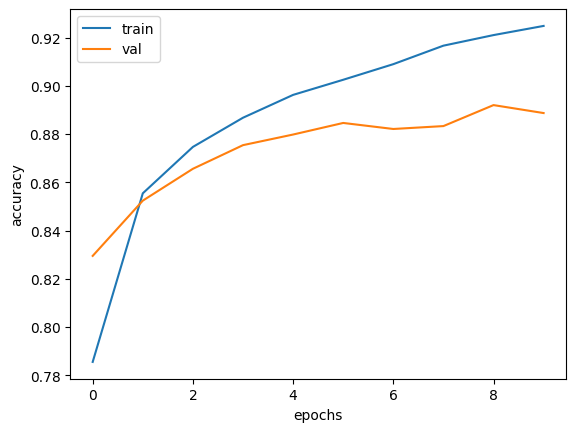

In [101]:
# 학습 정확도 (epoch)에 따른 accuracy변화)
plt.plot(history.history['accuracy'],label ='train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

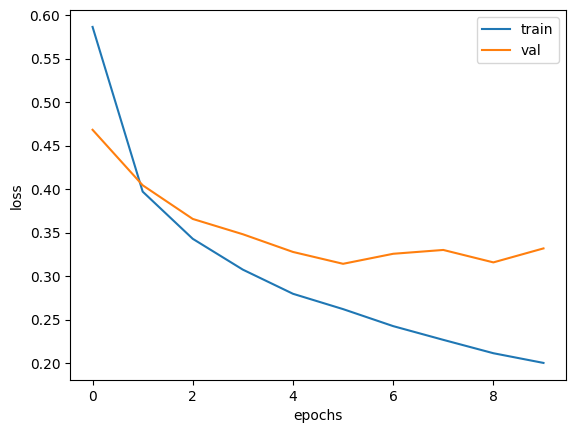

In [102]:
# loss
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()